## In previous upsampling and downSampling technique our new data overlaps on the old data `So` this is not good for model
## But in this techniquq our data dose not overlap instead of overlaping this basically finds the nearest pionts and than make data points on that nearest data point

# SMOTE(Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class.
 SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances

In [107]:

# I wanna to have a dataset with problem of classification thats why I am using this library Or module

from sklearn.datasets import make_classification
import pandas as pd
# for visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

# for SMOTE techinque
from imblearn.over_sampling import SMOTE

In [108]:
# this dataset is going to be classification dataset

# Here X is independent(bcz it is input) And y is dependent(bcz it is output)
X , y = make_classification(n_samples=1000,# this will make 1000 data points
                            n_features=2, # features or just number of columns
                            n_clusters_per_class=1, # this is number of groups
                            weights=[0.9] ,# this gives the proportion of group
                            n_redundant=0,# this makes relation
                            random_state= 2 # my value was changing everytime as I run this again so I done this
                            )
X,y

(array([[-2.14034004,  0.56244104],
        [-0.51971882, -1.93226787],
        [-0.79463847,  1.77543075],
        ...,
        [-0.35581385,  2.23485679],
        [-1.99824143,  2.72959907],
        [-1.9134834 ,  1.14576409]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 

In [109]:
X.shape , y.shape

((1000, 2), (1000,))

In [110]:
# converting all to dataframe
df1 = pd.DataFrame(data=X,columns=['f1','f2'])
df2 = pd.DataFrame(data=y,columns=['target'])
df = pd.concat(objs=[df1,df2],axis=1)
df

,f1,f2,target
0,-2.140340,0.562441,0
1,-0.519719,-1.932268,0
2,-0.794638,1.775431,0
3,0.223479,2.096700,0
4,-1.332802,0.637973,0
...,...,...,...
995,-1.559079,1.754689,0
996,-0.620467,-0.230452,0
997,-0.355814,2.234857,0
998,-1.998241,2.729599,0


In [111]:
df

,f1,f2,target
0,-2.140340,0.562441,0
1,-0.519719,-1.932268,0
2,-0.794638,1.775431,0
3,0.223479,2.096700,0
4,-1.332802,0.637973,0
...,...,...,...
995,-1.559079,1.754689,0
996,-0.620467,-0.230452,0
997,-0.355814,2.234857,0
998,-1.998241,2.729599,0


In [112]:
df.target.value_counts()

0    897
1    103
Name: target, dtype: int64

## Visualising data

<Axes: xlabel='f1', ylabel='f2'>

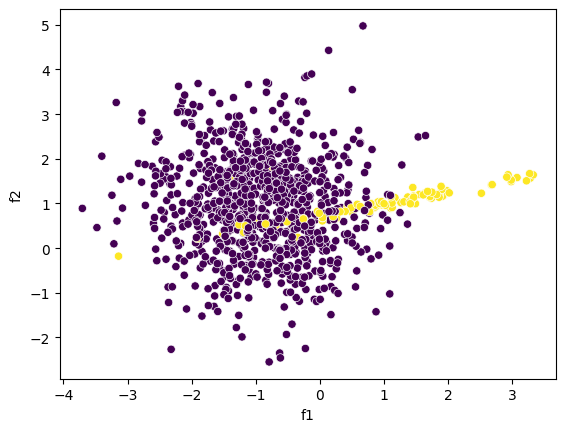

In [134]:
sns.scatterplot(x=df['f1'],y=df['f2'],data=df,c = df['target'])

In [120]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df['f1'],y=df['f2'] , mode='markers',))
# fig.add_trace(go.Scatter(x=df['f1'],y=df['f2'] , mode='markers'))
# above code didnt worked 
fig = px.scatter(x=df['f1'],y=df['f2'],color=df['target'])
fig.show()


## transforming the data

In [121]:

oversample = SMOTE()
oversample

SMOTE()

In [125]:
X,y= oversample.fit_resample(X=df[['f1','f2']],y=df['target'])

In [129]:
X.shape,y.shape

((1794, 2), (1794,))

In [132]:
#again converting all to dataframe after using SMOTE
df1 = pd.DataFrame(data=X,columns=['f1','f2'])
df2 = pd.DataFrame(data=y,columns=['target'])
df_SMOTE = pd.concat(objs=[df1,df2],axis=1)
df_SMOTE

,f1,f2,target
0,-2.140340,0.562441,0
1,-0.519719,-1.932268,0
2,-0.794638,1.775431,0
3,0.223479,2.096700,0
4,-1.332802,0.637973,0
...,...,...,...
1789,1.661826,1.238847,1
1790,3.107669,1.566049,1
1791,0.499417,0.845132,1
1792,1.327334,1.031259,1


## again Visualising data after SMOTE

In [138]:
fig = px.scatter(x=df_SMOTE['f1'],y=df_SMOTE['f2'],color=df_SMOTE['target'])
fig.show()


<Axes: xlabel='f1', ylabel='f2'>

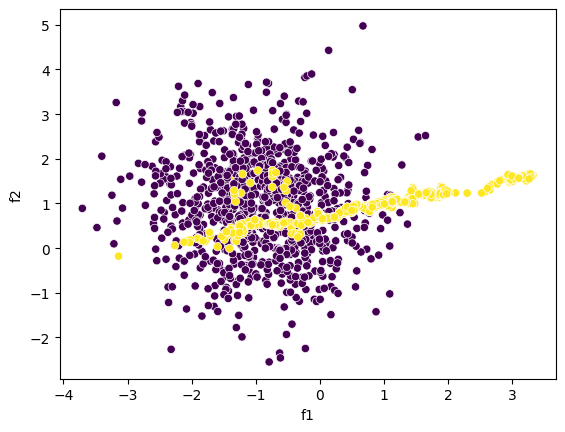

In [136]:
sns.scatterplot(x=df_SMOTE['f1'],y=df_SMOTE['f2'],data=df,c = df_SMOTE['target']) 
